In [24]:
#multi linear regression to predict insurance cost
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import sys


In [25]:
cols = list(pd.read_csv("50_startups.csv"))
print(cols)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


In [26]:
data = pd.read_csv("50_startups.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
#finding number of rows and columns
data.shape

(50, 5)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [30]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [31]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [32]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values
print(y)


[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [33]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [34]:
#Encoding the categorical data for "State" predictor. 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelencoder = LabelEncoder()



In [35]:
le.fit(X[:,3])
list(le.inverse_transform([0, 1, 2]))

['California', 'Florida', 'New York']

In [36]:
X[:,3] = labelencoder.fit_transform(X[:,3])


In [37]:
print(X)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 1]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 1]
 [100671.96 91790.61 249744.55 0]
 [93863.75 127320.38 249839.44 1]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 1]
 [86419.7 153514.11 0.0 2]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 1]
 [67532.53 105751.03 304768.73 1]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 1]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

<AxesSubplot:>

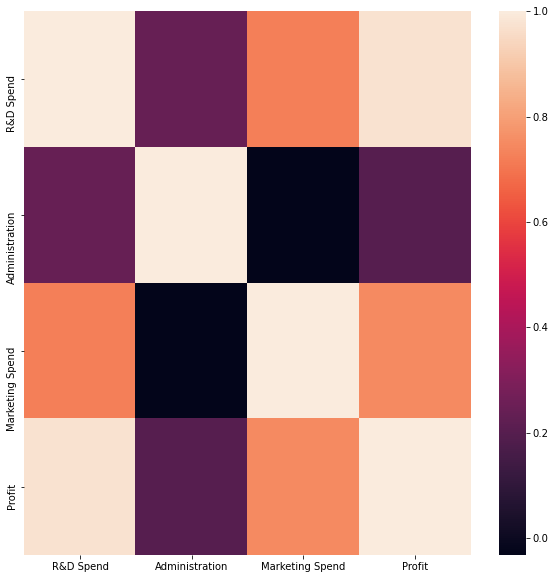

In [38]:
#exploratory data analysis
#correlation heat map
corelation = data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corelation)



In [39]:
#Splitting the data in training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [40]:
#Fitting the Multiple linear rehression on training set.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
#Predicting on test set.
y_pred = reg.predict(X_test)
y_pred

array([ 83955.18776337, 151102.78698308,  97157.3009556 ,  89740.46160853,
        87656.26069111, 118292.29481176, 129435.49880097, 163390.68684942,
        43712.99641838,  95757.45774787, 161564.17307173, 136132.95335076,
       174038.67862763, 157819.75946317,  64890.74104465])

In [41]:
reg.score(X_test,y_test)

0.9332771904712428

In [42]:
y_pred - y_test

array([  2949.42776337,  18500.13698308,    378.3809556 ,   -208.67839147,
        -8823.24930889,   -181.73518824,   5168.59880097,   6399.56684942,
       -21213.08358162,  -1726.10225213,   5441.66307173,  -9988.99664924,
        -8863.31137237,   8059.79946317,   -309.58895535])

Text(0, 0.5, 'Predicted')

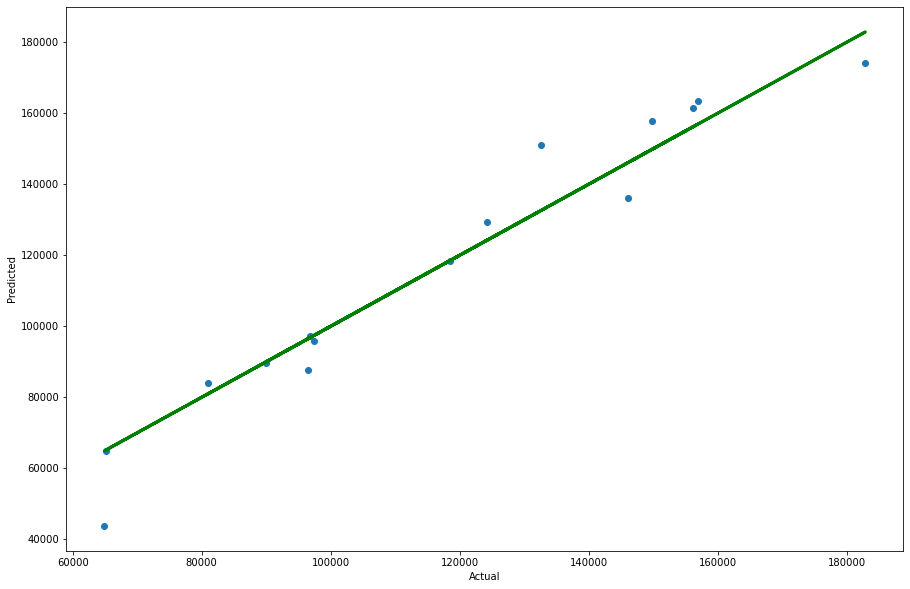

In [43]:
plt.figure(figsize = (15,10))
plt.scatter(y_test,y_pred)
plt.plot(y_test, y_test, color='green', linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')